In [1]:
import pandas as pd
import sklearn
from google.colab import files




In [2]:
df= pd.read_csv("indie.csv") #holds feature values
df2=pd.read_csv("indie_d.csv") #holds dates

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

In [4]:
#fatal code
df2 =df2.iloc[:, 1:]
df = df.iloc[:, 1:]

In [5]:
#Dropping non-matching ids, if any

id1= df['id']
id2= df2['id']
id1[~id1.isin(id2)]

#df = df.drop(labels=[542,543,544], axis=0) #Implemented once

Series([], Name: id, dtype: object)

In [7]:
#Merging both the dataframes
dataframe_cat= pd.merge(df, df2, on='id')
dataframe_cat

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,release_date
0,0.34000,https://api.spotify.com/v1/audio-analysis/315e...,0.446,365812,0.5450,315eI7UDIy73D3bpdhiVii,0.000000,10,0.0912,-8.934,1,0.0480,160.028,3,https://api.spotify.com/v1/tracks/315eI7UDIy73...,audio_features,spotify:track:315eI7UDIy73D3bpdhiVii,0.4510,2020-10-20
1,0.00663,https://api.spotify.com/v1/audio-analysis/1CYm...,0.372,417056,0.8100,1CYmT4NcMunPefrjHwCad8,0.205000,4,0.5870,-6.034,1,0.0578,169.936,4,https://api.spotify.com/v1/tracks/1CYmT4NcMunP...,audio_features,spotify:track:1CYmT4NcMunPefrjHwCad8,0.2450,2014-08-01
2,0.25100,https://api.spotify.com/v1/audio-analysis/6pL3...,0.475,438132,0.5730,6pL3w33i7qd4a0boLxPXWV,0.908000,11,0.0770,-9.450,0,0.0504,137.750,4,https://api.spotify.com/v1/tracks/6pL3w33i7qd4...,audio_features,spotify:track:6pL3w33i7qd4a0boLxPXWV,0.5140,2016-10-11
3,0.00602,https://api.spotify.com/v1/audio-analysis/5nNR...,0.573,347492,0.8050,5nNRWKhF7fcWaU2Et8jExF,0.047100,11,0.1210,-8.018,1,0.0382,144.969,4,https://api.spotify.com/v1/tracks/5nNRWKhF7fcW...,audio_features,spotify:track:5nNRWKhF7fcWaU2Et8jExF,0.5050,2018-08-16
4,0.74800,https://api.spotify.com/v1/audio-analysis/0CI1...,0.482,226987,0.5500,0CI1hWyyQJZLuvOugqWKnG,0.560000,1,0.1360,-8.905,1,0.0297,75.001,4,https://api.spotify.com/v1/tracks/0CI1hWyyQJZL...,audio_features,spotify:track:0CI1hWyyQJZLuvOugqWKnG,0.2540,2019-10-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.76900,https://api.spotify.com/v1/audio-analysis/3WjH...,0.685,120955,0.3890,3WjHIB7EHWBnyNShqye1RZ,0.036200,3,0.1910,-10.239,1,0.0341,109.880,4,https://api.spotify.com/v1/tracks/3WjHIB7EHWBn...,audio_features,spotify:track:3WjHIB7EHWBnyNShqye1RZ,0.5000,2021-05-15
1007,0.24400,https://api.spotify.com/v1/audio-analysis/6Twc...,0.774,172565,0.4850,6Twcvh5uBvLgW737fuMZ07,0.000001,6,0.0340,-7.468,0,0.2450,88.948,4,https://api.spotify.com/v1/tracks/6Twcvh5uBvLg...,audio_features,spotify:track:6Twcvh5uBvLgW737fuMZ07,0.5790,2021-05-09
1008,0.20700,https://api.spotify.com/v1/audio-analysis/5zV1...,0.315,236690,0.6980,5zV1rHxwFqsLq5TPxzjPAG,0.000009,11,0.0526,-6.091,0,0.0510,143.696,4,https://api.spotify.com/v1/tracks/5zV1rHxwFqsL...,audio_features,spotify:track:5zV1rHxwFqsLq5TPxzjPAG,0.2350,2021-05-16
1009,0.93600,https://api.spotify.com/v1/audio-analysis/05v6...,0.396,349655,0.0673,05v6R3VThUJ3uk1dfvNis4,0.004670,9,0.0895,-18.659,1,0.0381,116.074,3,https://api.spotify.com/v1/tracks/05v6R3VThUJ3...,audio_features,spotify:track:05v6R3VThUJ3uk1dfvNis4,0.0763,2021-05-24


In [11]:
#for finalset checking if date values redundant
for value in dataframe_cat['release_date'].values:
   if type(value) is not str:
     print(value)

In [12]:
#Sorting values by release_date
dataframe_cat.sort_values(by=['release_date'], inplace=True)
dataframe_cat

#Converting to year
dataframe_cat['r_year'] =  pd.DatetimeIndex(pd.to_datetime(dataframe_cat['release_date'])).year


In [14]:
#Too old 
for year in dataframe_cat['r_year'].values:
  if year < 2010:
    dataframe_cat.drop(dataframe_cat.index[(dataframe_cat['r_year']==year)], inplace=True) 


In [15]:
#for finalset

year_df_new = dataframe_cat[['acousticness','danceability',	'energy',	'instrumentalness',	'liveness',	'loudness',	'speechiness','valence', 'r_year']].copy()
year_df_new.reset_index(drop=True, inplace=True)
year_df_new

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,r_year
0,0.07470,0.658,0.790,0.000234,0.0612,-7.382,0.0418,0.7430,2010
1,0.78500,0.469,0.361,0.001540,0.1040,-8.275,0.0293,0.0775,2010
2,0.01370,0.605,0.653,0.114000,0.1450,-6.495,0.0388,0.3790,2010
3,0.00493,0.520,0.897,0.000000,0.3290,-2.345,0.0416,0.3840,2010
4,0.00591,0.682,0.970,0.171000,0.0448,-5.332,0.0459,0.9590,2010
...,...,...,...,...,...,...,...,...,...
957,0.15500,0.644,0.313,0.000210,0.1300,-8.924,0.0908,0.3560,2021
958,0.78100,0.513,0.314,0.000202,0.3240,-11.744,0.0278,0.5250,2021
959,0.95800,0.306,0.236,0.004530,0.1110,-13.313,0.0331,0.3020,2021
960,0.40700,0.557,0.293,0.000672,0.0962,-13.429,0.0398,0.1330,2021


In [16]:
energy= year_df_new.groupby('r_year')
df_energy = energy.apply(lambda x: x['energy'].mean())

valence=year_df_new.groupby('r_year')
df_valence = valence.apply(lambda x:x['valence'].mean())

acousticness= year_df_new.groupby('r_year')
df_acousticness = acousticness.apply(lambda x: x['acousticness'].mean())

speechiness=year_df_new.groupby('r_year')
df_speechiness = speechiness.apply(lambda x:x['speechiness'].mean())

instrumentalness= year_df_new.groupby('r_year')
df_instrumentalness = instrumentalness.apply(lambda x: x['instrumentalness'].mean())

liveness=year_df_new.groupby('r_year')
df_liveness = liveness.apply(lambda x:x['liveness'].mean())

danceability=year_df_new.groupby('r_year') #Similar code for the rest of the features
df_danceability= danceability.apply(lambda x:x['danceability'].mean())

year=year_df_new.groupby('r_year')
df_year= year.apply(lambda x:x['r_year'].unique())

trend_df=pd.concat([df_danceability, df_acousticness, df_energy, df_instrumentalness, df_liveness, df_speechiness, df_valence, df_year], axis=1)




trend_df.columns =['danceability','acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'r_year']
trend_df['r_year']=trend_df['r_year'].astype(int) #converting object type to integer type for the year column

trend_df


,danceability,acousticness,energy,instrumentalness,liveness,speechiness,valence,r_year
r_year,,,,,,,,
2010,0.559143,0.136291,0.702143,0.149591,0.142714,0.042871,0.460357,2010
2011,0.580364,0.346967,0.597455,0.071039,0.190236,0.037591,0.384091,2011
2012,0.495182,0.354482,0.586091,0.077099,0.096227,0.052055,0.365273,2012
2013,0.570967,0.304671,0.586567,0.079616,0.178527,0.050833,0.443237,2013
2014,0.563680,0.335689,0.558800,0.143192,0.197888,0.047616,0.370324,2014
2015,0.521744,0.353784,0.581946,0.289509,0.173251,0.042295,0.391215,2015
2016,0.572378,0.287934,0.581216,0.197888,0.138651,0.062554,0.404514,2016
2017,0.500955,0.429876,0.521818,0.220286,0.158100,0.068118,0.302832,2017
2018,0.545961,0.466096,0.476168,0.085321,0.139034,0.061920,0.355775,2018


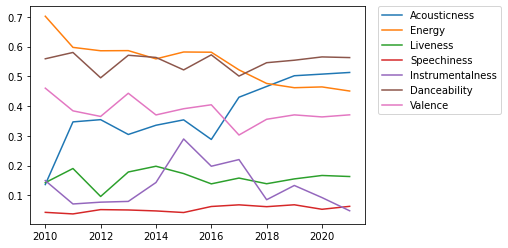

In [18]:
plt.plot(trend_df['r_year'], trend_df['acousticness'], label='Acousticness')
plt.plot(trend_df['r_year'], trend_df['energy'], label='Energy')
plt.plot(trend_df['r_year'], trend_df['liveness'], label='Liveness')
plt.plot(trend_df['r_year'], trend_df['speechiness'], label='Speechiness')
plt.plot(trend_df['r_year'], trend_df['instrumentalness'], label='Instrumentalness')
plt.plot(trend_df['r_year'], trend_df['danceability'], label='Danceability')
plt.plot(trend_df['r_year'], trend_df['valence'], label='Valence')


plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show()

#try getting mean values for all the years and plot feature vs year

In [17]:
#creating minutes column
def mstomin(millis):
  #minlist=[]
  #for millis in arr:
  millis = int(millis)
  seconds=(millis/1000)%60
  seconds = int(seconds)
  minutes=(millis/(1000*60))%60
  minutes = int(minutes)
  
  string_time=("%d:%d" % (minutes, seconds))
  min= datetime.datetime.strptime(string_time, '%M:%S')
  t1 = pd.Timestamp(min).minute
   
  return t1

mstomin2= np.vectorize(mstomin) #so 'only size-1 arrays can be converted to Python scalars' doesn't occur
dataframe_cat['minutes']= mstomin2(dataframe_cat['duration_ms'].values)

dataframe_cat['minutes']

857    4
190    4
10     6
243    2
121    4
      ..
968    2
877    4
912    3
595    4
588    3
Name: minutes, Length: 962, dtype: int64

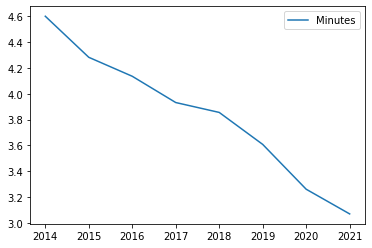

In [19]:
#duration trend
min_y=dataframe_cat.groupby('r_year')['minutes'].mean()
tempo=dataframe_cat.groupby('r_year')['tempo'].mean()
r_year=dataframe_cat.groupby('r_year')['r_year'].mean()

dframe2=pd.concat([min_y, tempo, r_year], axis=1)
dframe2.columns =['min_y','tempo', 'r_year']
dframe2['r_year']=dframe2['r_year'].astype(int)

for year in dframe2['r_year'].values:
  if year < 2014:
    dframe2.drop(dframe2.index[(dframe2['r_year']==year)], inplace=True)

plt.plot(dframe2['r_year'], dframe2['min_y'], label='Minutes')

plt.legend()
plt.show()


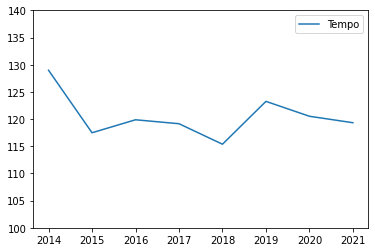

In [20]:
#Trend in tempo

plt.plot(dframe2['r_year'], dframe2['tempo'], label='Tempo')

plt.ylim(100, 140)
plt.legend()
plt.show()  


In [21]:
df_feature_only = dataframe_cat.drop(['analysis_url', 'duration_ms', 'id', 'key','tempo', 'mode', 'time_signature', 'track_href', 'type', 'uri', 'release_date' ], axis= 1)


In [22]:
#normalizing data 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df_final = scaler.fit_transform(df_feature_only)
df_final = pd.DataFrame(df_final)
df_final.columns = df_feature_only.columns
df_final.drop(labels=['r_year', 'minutes', 'loudness'],axis=1, inplace=True)
df_final

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.075079,0.650035,0.797503,0.000246,0.036230,0.031723,0.762954
1,0.789722,0.431739,0.347393,0.001616,0.081971,0.009193,0.064926
2,0.013706,0.588820,0.653761,0.119622,0.125788,0.026316,0.381162
3,0.004882,0.490644,0.909768,0.000000,0.322432,0.031363,0.386407
4,0.005868,0.677755,0.986360,0.179433,0.018703,0.039113,0.989511
...,...,...,...,...,...,...,...
957,0.155870,0.633865,0.297031,0.000220,0.109757,0.120043,0.357038
958,0.785698,0.482559,0.298080,0.000212,0.317089,0.006489,0.534298
959,0.963780,0.243474,0.216242,0.004753,0.089452,0.016042,0.300399
960,0.409411,0.533380,0.276047,0.000705,0.073635,0.028118,0.123138


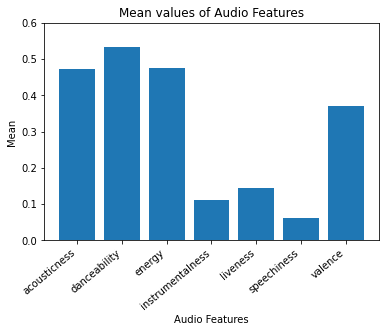

In [24]:
#Bar graph showing means 

plt.bar(df_final.columns, df_final.mean())
plt.xticks(rotation=40, horizontalalignment='right')

plt.xlabel('Audio Features')
plt.ylabel('Mean')
plt.title('Mean values of Audio Features')

plt.ylim(0, 0.60)

plt.show()


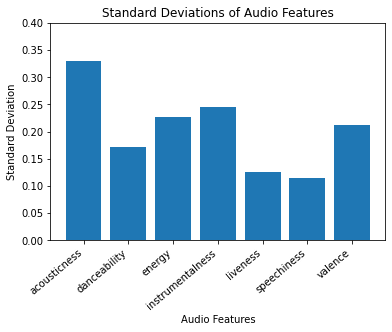

In [25]:
#bar graph showing standard deviations
plt.bar(df_final.columns, df_final.std())
plt.xticks(rotation=40, horizontalalignment='right')

plt.xlabel('Audio Features')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviations of Audio Features')
plt.ylim(0, 0.40)

plt.show()

#Most consistent 

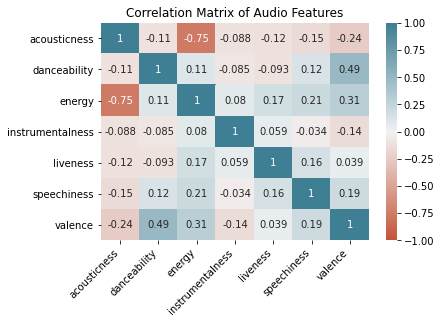

In [26]:
corr_mat= df_final.corr()
hmap= sns.heatmap(corr_mat,annot = True,
            vmin=-1, vmax=1, center=0,
           cmap=sns.diverging_palette(20, 220, n=200),
           #square=True
            )
hmap.set_xticklabels(
    hmap.get_xticklabels(),
    rotation= 45,
    horizontalalignment='right'
);

plt.title('Correlation Matrix of Audio Features')
plt.show()

#strong correlations:
#1. Acousticness and Energy
#2. Acousticness and Loudness
#3. Danceability and valence
#4. Energy and Loudness
#5. Valence and Energy (moderate)